# 0.0. BIBLIOTECAS

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import inflection
import datetime

from IPython.core.display import HTML
from IPython.display import Image

## 0.1. FUNCOES AUXILIARES

## 0.2. CARGA DE DADOS

In [3]:
# carregando os dados na variável como um dataframe
data_sales_raw = pd.read_csv('../data/train.csv', low_memory = False)

# verificando
data_sales_raw.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# carregando os dados na variável como um dataframe
data_store_raw = pd.read_csv('../data/store.csv', low_memory = False)

# verificando
data_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# merge das duas bases
data_raw = pd.merge(data_sales_raw, data_store_raw, how = 'left', on = 'Store')

# verificando
data_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. PASSO 01: DESCRICAO DOS DADOS

In [6]:
# backup
data_01 = data_raw.copy()

## 1.1. Renomear colunas

In [7]:
# verificando o nome das colunas
data_01.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
# renomeando as colunas
cols_old = [
    'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
    'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'
    ]

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

data_01.columns = cols_new

# verificando
data_01.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Dimensões dos dados

In [9]:
# verificando as dimensões dos dados
print(f'Número de linhas: {data_01.shape[0]}')
print(f'Número de colunas: {data_01.shape[1]}')

Número de linhas: 1017209
Número de colunas: 18


## 1.3. Tipo dos dados

In [10]:
# verificando o tipo de dados
data_01.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
# transformando o formato da coluna data
data_01['date'] = pd.to_datetime(data_01['date'])

# verificando
data_01.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Dados nulos ou vazios

In [12]:
# verificando dados nulos ou vazios
data_01.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Preencher nulos e vazios

In [13]:
# competition_distance
data_01['competition_distance'] = data_01.competition_distance.apply(lambda x: 200000 if math.isnan(x) else x)

# competition_open_since_month
data_01['competition_open_since_month'] = data_01.apply(lambda x: x.date.month if math.isnan(x.competition_open_since_month) else x.competition_open_since_month, axis = 1)

# competition_open_since_year
data_01['competition_open_since_year'] = data_01.apply(lambda x: x.date.year if math.isnan(x.competition_open_since_year) else x.competition_open_since_year, axis = 1)

# promo2_since_week
data_01['promo2_since_week'] = data_01.apply(lambda x: x.date.week if math.isnan(x.promo2_since_week) else x.promo2_since_week, axis = 1)

# promo2_since_year
data_01['promo2_since_year'] = data_01.apply(lambda x: x.date.year if math.isnan(x.promo2_since_year) else x.promo2_since_year, axis = 1)

# promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', }
data_01['promo_interval'].fillna(0, inplace = True)
data_01['month_map'] = data_01.date.dt.month.map(month_map)
data_01['is_promo'] = data_01[['promo_interval', 'month_map']].apply(lambda x: 0 if x.promo_interval == 0 else 1 if x.month_map in x.promo_interval.split(',') else 0, axis = 1)

# verificando
data_01.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul,0


In [14]:
# verificando dados nulos ou vazios
data_01.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Troca de tipos de dados

In [15]:
# verificando o tipo de dados das colunas
data_01.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [16]:
# trocando alguns formatos
data_01['competition_open_since_month'] = data_01['competition_open_since_month'].astype(int)
data_01['competition_open_since_year'] = data_01['competition_open_since_year'].astype(int)

data_01['promo2_since_week'] = data_01['promo2_since_week'].astype(int)
data_01['promo2_since_year'] = data_01['promo2_since_year'].astype(int)

In [17]:
# verificando o tipo de dados das colunas
data_01.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Estatística descritiva

In [18]:
# separando o dataframe em variáveis numéricas e categóricas
num_attributes = data_01.select_dtypes(include = ['int64', 'float64'])
cat_attributes = data_01.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Atributos numéricos

In [19]:
# central tendency - mean, median
central_tendency_01 = pd.DataFrame(num_attributes.apply(np.mean)).T
central_tendency_02 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
dispersion_01 = pd.DataFrame(num_attributes.apply(np.std)).T
dispersion_02 = pd.DataFrame(num_attributes.apply(np.min)).T
dispersion_03 = pd.DataFrame(num_attributes.apply(np.max)).T
dispersion_04 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
dispersion_05 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
dispersion_06 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenando
descriptive_statistics = pd.concat([dispersion_02, dispersion_03, dispersion_04, central_tendency_01, central_tendency_02, dispersion_01, dispersion_05, dispersion_06]).T.reset_index()
descriptive_statistics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# verificando
descriptive_statistics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304



### 1.7.2. Atributos numéricos

In [20]:
# analisando as variáveis categoricas
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

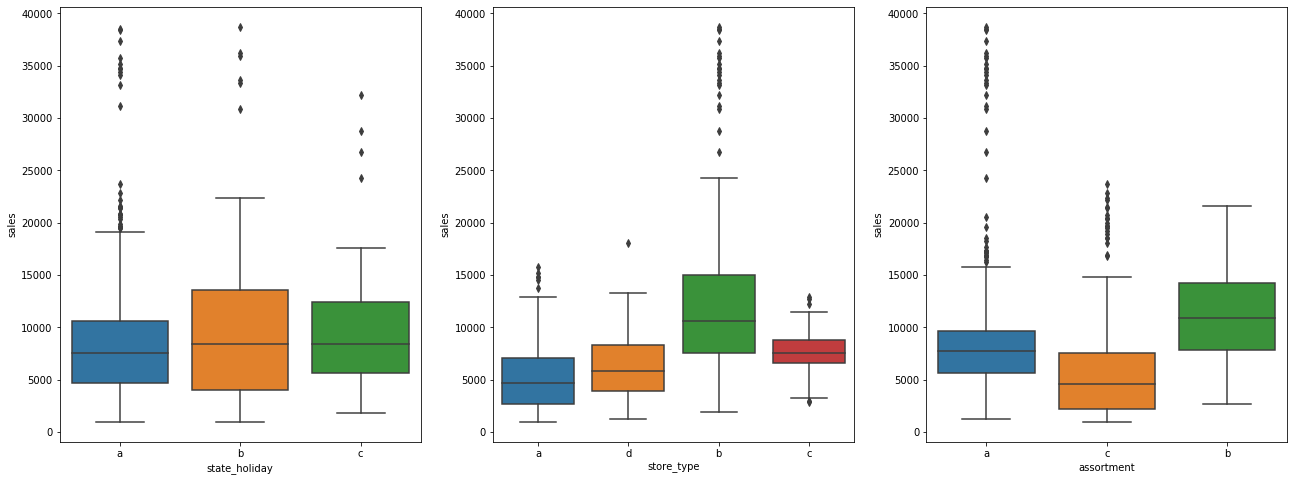

In [21]:
aux_01 = data_01[(data_01['state_holiday'] != '0') & (data_01['sales'] > 0)]

plt.figure(figsize = (22, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux_01)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'store_type', y = 'sales', data = aux_01)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'assortment', y = 'sales', data = aux_01)

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [22]:
# backup
data_02 = data_01.copy()

Mapa mental de hipóteses

- Fenômeno
    - Qual fenômeno estou modelando?
- Agentes:
    - Quem são os agentes que atuam sobre o fenômeno
- Atributos dos agentes:
    - Qual a descrição dos agentes

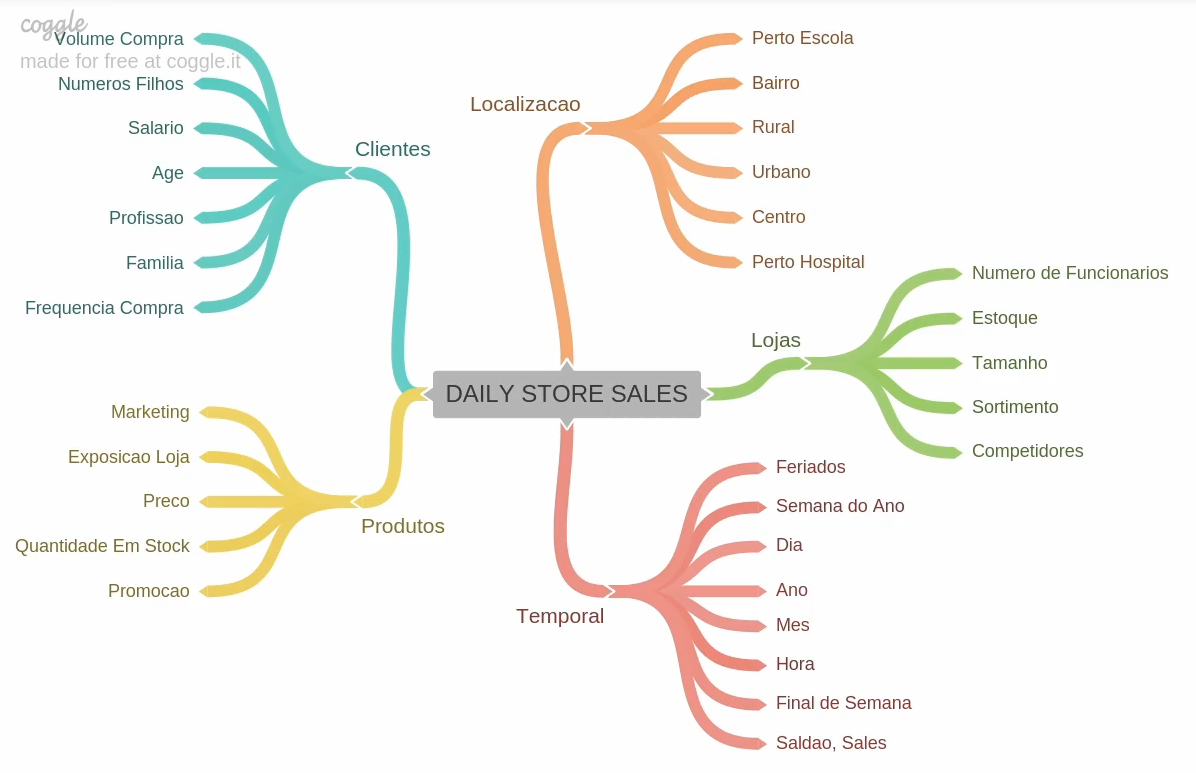

In [23]:
Image('../img/MindMapHypothesis.png')

Como escrever as hipóteses?

- Hipóteses são apostas
    - Lojas de MAIOR porte deveriam vender MAIS.
    - Lojas com MAIOR sortimento deveriam vender MAIS.
    - Lojas com MAIS competidores por perto deveriam vender MENOS.

## 2.1. CRIACAO DAS HIPÓTESES

### 2.1.1. HIPOTESES LOJA

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.1.2. HIPOTESES PRODUTO

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.1.3. HIPOTESES TEMPO

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

2.2. LISTA FINAL DE HIPOTESES

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.
___
**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.
___
**7.** Lojas abertas durante o feriado de natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Feature Engineering

In [31]:
# year
data_02['year'] = data_02.date.dt.year

# month
data_02['month'] = data_02.date.dt.month

# day
data_02['day'] = data_02.date.dt.day

# week of year
data_02['week_of_year'] = data_02.date.dt.weekofyear

# year week
data_02['year_week'] = data_02.date.dt.strftime('%Y-%W')


# competition since
data_02['competition_since'] = data_02.apply(lambda x: datetime.datetime(year = x.competition_open_since_year, month = x.competition_open_since_month, day = 1), axis = 1)
data_02['competition_time_month'] = ((data_02.date - data_02.competition_since) / 30).apply(lambda x: x.days).astype(int)

# promo since
data_02['promo_since'] = data_02.promo2_since_year.astype(str) + '-' + data_02.promo2_since_week.astype(str)
data_02.promo_since = data_02.promo_since.apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
data_02['promo_time_week'] = ((data_02.date - data_02.promo_since) / 7).apply(lambda x: x.days).astype(int)

# assortment
data_02.assortment = data_02.assortment.apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
data_02.state_holiday = data_02.state_holiday.apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [32]:
# verificando
data_02.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. PASSO 03 - FILTRAGEM DE VARIAVEIS

Filtragem de variáveis vs Seleção de variáveis

- Filtragem das variaveis:
    - Restrições de acordo com o negócio.
- Seleção de variáveis:
    - Variáveis mais relevantes para o modelo.

In [37]:
# backup
data_03 = data_02.copy()

## 3.1. Filtragem das Linhas

In [38]:
# filtranmdo as linhas do conjunto de dados
data_03 = data_03[(data_03.open != 0) & (data_03.sales > 0)]

## 3.2. Seleção das Colunas

In [39]:
# selecionando as colunas para dropar
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

# dropando as colunas
data_03 = data_03.drop(columns = cols_drop)

# verificando
data_03.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'promo_since', 'promo_time_week',
       'competition_since', 'competition_time_month'],
      dtype='object')